## Ridge Regression Animation

This animation shows:

✔ Effect of λ (alpha) on Ridge Regression

✔ As λ increases, model becomes smoother

✔ You visually see shrinking of coefficients

✔ Saved as a GIF

✔ No Matplotlib errors

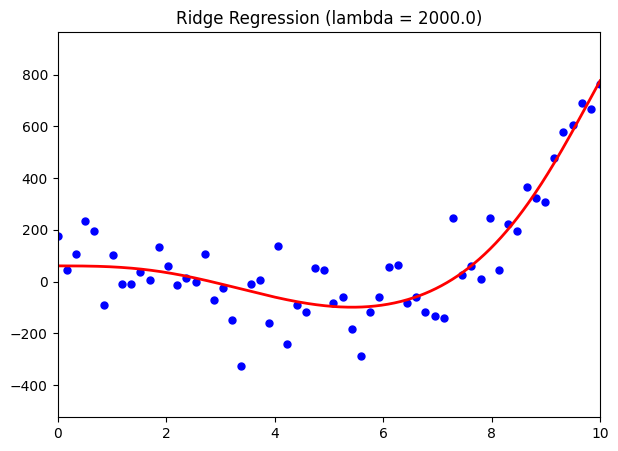

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# Create folder for saving GIFs
os.makedirs("gifs", exist_ok=True)


# Generate nonlinear sample data
np.random.seed(0)
X = np.linspace(0, 10, 60)
y = 3 * X**3 - 25 * X**2 + 30 * X + np.random.randn(60) * 100
X = X.reshape(-1, 1)

# Use fixed polynomial degree
degree = 8
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Lambda (alpha) values
lambdas = np.linspace(0, 2000, 40)  # 40 frames

# Plot setup
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X, y, color='blue', s=25)
line, = ax.plot([], [], color='red', linewidth=2)

def update(i):
    alpha = lambdas[i]

    model = Ridge(alpha=alpha)
    model.fit(X_poly, y)

    # Smooth grid
    X_grid = np.linspace(0, 10, 500).reshape(-1, 1)
    X_grid_poly = poly.transform(X_grid)
    y_pred = model.predict(X_grid_poly)

    line.set_data(X_grid, y_pred)

    ax.set_title(f"Ridge Regression (lambda = {alpha:.1f})")
    ax.set_xlim(0, 10)
    ax.set_ylim(min(y)-200, max(y)+200)

    return line,

ani = FuncAnimation(fig, update, frames=len(lambdas), interval=200)

# Save GIF BEFORE show()
ani.save("gifs/ridge_regression.gif", writer="pillow")

plt.show()
